**Table of contents**<a id='toc0_'></a>    
- [Milestone 4](#toc1_)    
  - [Problem Statement](#toc1_1_)    
  - [Exploratory Data Analysis](#toc1_2_)    
  - [Base Models](#toc1_3_)    
    - [Linear Regression](#toc1_3_1_)    
    - [Decision Tree](#toc1_3_2_)    
    - [Random Forest](#toc1_3_3_)    
    - [Gradient Boosting](#toc1_3_4_)    
    - [Time Series](#toc1_3_5_)    
  - [Comparision](#toc1_4_)    
  - [Conclusion](#toc1_5_)    

<!-- vscode-jupyter-toc-config
    numbering=false
    anchor=true
    flat=false
    minLevel=1
    maxLevel=6
    /vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Milestone 4](#toc0_)

In [76]:
from utils import *
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import os
import csv
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)


# <a id='toc1_1_'></a>[Problem Statement](#toc0_)

# <a id='toc1_2_'></a>[Exploratory Data Analysis](#toc0_)

- [**Loading the Data**](#intro)

- [**Infotable EDA**](#infotable)

- [**Coverpage EDA**](#coverpage)

- [**Summarypage EDA**](#summarypage)

- [**Data Cleaning**](#data-cleaning)

- [**Data Visualization**](#data-visualization)

<a id="intro"></a>

## Loading the Data

[Return to contents](#contents)

In [77]:
try:
    df_info = pd.read_csv("../data/2024q3/INFOTABLE.tsv", sep="\t", low_memory=False)
except:
    df_info = pd.read_csv("XGBoost/infotable_dataset.csv", low_memory=False)
    
try:
    df_cover = pd.read_csv("XGBoost/coverpage_dataset.csv")
except:
    df_cover = pd.read_csv("../data/2024q3/COVERPAGE.tsv", sep="\t", low_memory=False)
    
try: 
    df_summary = pd.read_csv("XGBoost/summarypage_dataset.csv")
except:
    df_summary = pd.read_csv("../data/2024q3/SUMMARYPAGE.tsv", sep="\t", low_memory=False)

In [78]:
print(f"Infotable has {len(df_info)} rows.")

Infotable has 3278515 rows.


In [79]:
print(f"Coverpage has {len(df_cover)} rows.")

Coverpage has 10117 rows.


In [80]:
print(f"Summarypage has {len(df_summary)} rows.")

Summarypage has 8244 rows.


<a id="summaryinfo"></a>

### Summary

In this summary section we look at basic information about the INFOTABLE dataset including its shape, data types, and descriptive statistics.

In [81]:
df_info.shape

(3278515, 15)

We see that the shape of the dataset for INFOTABLE contains 3278515 rows and 16 columns. We can further observe the data types for INFOTABLE:

In [82]:
print(df_info.dtypes)

ACCESSION_NUMBER        object
INFOTABLE_SK             int64
NAMEOFISSUER            object
TITLEOFCLASS            object
CUSIP                   object
FIGI                    object
VALUE                    int64
SSHPRNAMT                int64
SSHPRNAMTTYPE           object
PUTCALL                 object
INVESTMENTDISCRETION    object
OTHERMANAGER            object
VOTING_AUTH_SOLE         int64
VOTING_AUTH_SHARED       int64
VOTING_AUTH_NONE         int64
dtype: object


Next, we look at the descriptive statistics for the numerical columns.

In [83]:
print(df_info.describe())

       INFOTABLE_SK         VALUE     SSHPRNAMT  VOTING_AUTH_SOLE  \
count  3.278515e+06  3.278515e+06  3.278515e+06      3.278515e+06   
mean   1.035340e+08  1.789295e+07  2.946283e+05      2.208318e+05   
std    9.464430e+05  6.866326e+08  2.682088e+07      2.671712e+07   
min    1.018926e+08  0.000000e+00  0.000000e+00      0.000000e+00   
25%    1.027144e+08  1.383600e+04  6.310000e+02      0.000000e+00   
50%    1.035340e+08  3.068430e+05  7.208000e+03      3.040000e+02   
75%    1.043537e+08  2.107060e+06  4.652700e+04      1.750000e+04   
max    1.051733e+08  5.453552e+11  4.197289e+10      4.197289e+10   

       VOTING_AUTH_SHARED  VOTING_AUTH_NONE  
count        3.278515e+06      3.278515e+06  
mean         2.144117e+04      6.022588e+04  
std          7.194901e+05      2.094831e+06  
min          0.000000e+00      0.000000e+00  
25%          0.000000e+00      0.000000e+00  
50%          0.000000e+00      0.000000e+00  
75%          0.000000e+00      1.558000e+03  
max       

We see that for the columns `VOTING_AUTH_SOLE`, `VOTING_AUTH_SHARED`, and `VOTING_AUTH_NONE` have many 0 values. These columns represent voting authority, which means that many entities do not hold

Next, we look at the descriptive statistics for the categorical columns.

In [84]:
print(df_info.describe(include=['object']))


            ACCESSION_NUMBER NAMEOFISSUER TITLEOFCLASS      CUSIP  \
count                3278515      3277716      3277505    3278515   
unique                  8125       137383        17383      38668   
top     0001086364-24-008417   ISHARES TR          COM  037833100   
freq                   48161       115603      1580355       9531   

                FIGI SSHPRNAMTTYPE PUTCALL INVESTMENTDISCRETION OTHERMANAGER  
count         260310       3278515  115797              3278515      1519535  
unique         16021             2       2                    3         3235  
top     BBG019PD35Z0            SH    Call                 SOLE            1  
freq            2288       3247099   59458              2003219       303501  


<a id="missingvalues"></a>

### Missing Values

In this section we look at the missing values in each column of INFOTABLE.

In [85]:
print(df_info.isna().sum())

ACCESSION_NUMBER              0
INFOTABLE_SK                  0
NAMEOFISSUER                799
TITLEOFCLASS               1010
CUSIP                         0
FIGI                    3018205
VALUE                         0
SSHPRNAMT                     0
SSHPRNAMTTYPE                 0
PUTCALL                 3162718
INVESTMENTDISCRETION          0
OTHERMANAGER            1758980
VOTING_AUTH_SOLE              0
VOTING_AUTH_SHARED            0
VOTING_AUTH_NONE              0
dtype: int64


The columns `NAMEOFISSUER`, `TITLEOFCLASS`, `FIGI`, `PUTCALL`, and `OTHERMANAGER` have missing values. However, this will not be an issue. Note that `NAMEOFISSUER`, `TITLEOFCLASS`, and `FIGI` can be used to identifier the specific security, but this is unnecessary because the securities can be uniquely identified using the `CUSIP`. 

The `PUTCALL` column has many missing values, but these are easily filled in. If the value is missing, we can assume that the security is neither a put nor a call, but instead owned outright.

`OTHERMANAGER` has missing values, but this is not an issue. This column is only used when the investment discretion is shared with another manager. If the value is missing, then the investment discretion is not shared. 

In [86]:
df_info['PUTCALL'] = df_info['PUTCALL'].fillna('N/A')
df_info['OTHERMANAGER'] = df_info['OTHERMANAGER'].fillna('N/A')

<a id="coverpage"></a>

## Coverpage EDA

[Return to contents](#contents)

- [**Summary**](#summarycover)

- [**Missing Values**](#missingvaluescover)

- [**Data Imbalance**](#imbalancecover)

<a id="summarycover"></a>

### Summary

This section presents the basic summary of the COVERPAGE dataset, such as the data types, shape, and descriptive statistics of the columns.

In [87]:
print("Shape for Coverpage dataframe:")
print(df_cover.shape)

Shape for Coverpage dataframe:
(10117, 22)


We see that the COVERPAGE dataframe has 22 columns and 10117 rows. We observe the exact types and names of each column:

In [88]:
print("Data types of the columns for Coverpage:")
print(df_cover.dtypes)

Data types of the columns for Coverpage:
ACCESSION_NUMBER                 object
REPORTCALENDARORQUARTER          object
ISAMENDMENT                      object
AMENDMENTNO                     float64
AMENDMENTTYPE                    object
CONFDENIEDEXPIRED                object
DATEDENIEDEXPIRED                object
DATEREPORTED                     object
REASONFORNONCONFIDENTIALITY      object
FILINGMANAGER_NAME               object
FILINGMANAGER_STREET1            object
FILINGMANAGER_STREET2            object
FILINGMANAGER_CITY               object
FILINGMANAGER_STATEORCOUNTRY     object
FILINGMANAGER_ZIPCODE            object
REPORTTYPE                       object
FORM13FFILENUMBER                object
CRDNUMBER                       float64
SECFILENUMBER                    object
PROVIDEINFOFORINSTRUCTION5       object
ADDITIONALINFORMATION            object
timestamp                        object
dtype: object


Next, the descriptive statistics of the numeric columns:

In [89]:
print("Descriptive statistics for numerical columns:")
print(df_cover.describe())

Descriptive statistics for numerical columns:
       AMENDMENTNO     CRDNUMBER
count   406.000000  4.408000e+03
mean      1.238916  4.272362e+05
std       1.665796  1.393088e+07
min       1.000000  0.000000e+00
25%       1.000000  1.193845e+05
50%       1.000000  1.574280e+05
75%       1.000000  2.878568e+05
max      27.000000  9.215079e+08


We see there are only 2 numeric features in this dataset. However, AMENTMENTNO is simply just the amendment number, so it is essentially a categorical variable. Also, CRDNUMBER could also be interpreted as a categorical variable, so all the variables are categorical.

Next, the categorical columns:

In [90]:
print("Descriptive statistics for categorical columns:")
print(df_cover.describe(include=['object']))

Descriptive statistics for categorical columns:
            ACCESSION_NUMBER REPORTCALENDARORQUARTER ISAMENDMENT  \
count                  10117                   10117        5415   
unique                 10117                      42           2   
top     0002035951-24-000001             30-JUN-2024           N   
freq                       1                    9100        5009   

       AMENDMENTTYPE CONFDENIEDEXPIRED DATEDENIEDEXPIRED DATEREPORTED  \
count            406               116                16           16   
unique             2                 2                 6            9   
top      RESTATEMENT                 N       14-AUG-2024  15-MAY-2024   
freq             233               100                 8            5   

           REASONFORNONCONFIDENTIALITY        FILINGMANAGER_NAME  \
count                               16                     10117   
unique                               1                      9018   
top     Confidential Treatment Expired  G

<a id="missingvaluescover"></a>


### Missing values

In [91]:
df_cover['REPORTTYPE'].unique()

array(['13F HOLDINGS REPORT', '13F NOTICE', '13F COMBINATION REPORT'],
      dtype=object)

In [92]:
print("Number of missing values in each column of the infotable:")
print(df_cover.isna().sum())

Number of missing values in each column of the infotable:
ACCESSION_NUMBER                    0
REPORTCALENDARORQUARTER             0
ISAMENDMENT                      4702
AMENDMENTNO                      9711
AMENDMENTTYPE                    9711
CONFDENIEDEXPIRED               10001
DATEDENIEDEXPIRED               10101
DATEREPORTED                    10101
REASONFORNONCONFIDENTIALITY     10101
FILINGMANAGER_NAME                  0
FILINGMANAGER_STREET1               3
FILINGMANAGER_STREET2            4471
FILINGMANAGER_CITY                 11
FILINGMANAGER_STATEORCOUNTRY        3
FILINGMANAGER_ZIPCODE              21
REPORTTYPE                          0
FORM13FFILENUMBER                   0
CRDNUMBER                        5709
SECFILENUMBER                    5959
PROVIDEINFOFORINSTRUCTION5          0
ADDITIONALINFORMATION            9704
timestamp                           0
dtype: int64


Clearly, a large number of columns in the `COVERPAGE` table have missing values. This is not surprising, as not all columns are required to be filled out by the filer. For example, the `AMENDMENTNO` column is only filled out if the `ISAMENDMENT` column is checked. In our data analysis, the only columns that we may use are `ACCESSION_NUMBER`, `REPORTCALENDARORQUARTER`, and `ISAMENDMENT`. Therefore, we can replace missing values in `ISAMENDMENT` with `N` and missing values in `AMENDMENTNO` with `0`.

In [93]:
df_cover['AMENDMENTNO'] = df_cover['AMENDMENTNO'].fillna(0)
df_cover['AMENDMENTTYPE'] = df_cover['AMENDMENTTYPE'].fillna('NEW HOLDINGS')

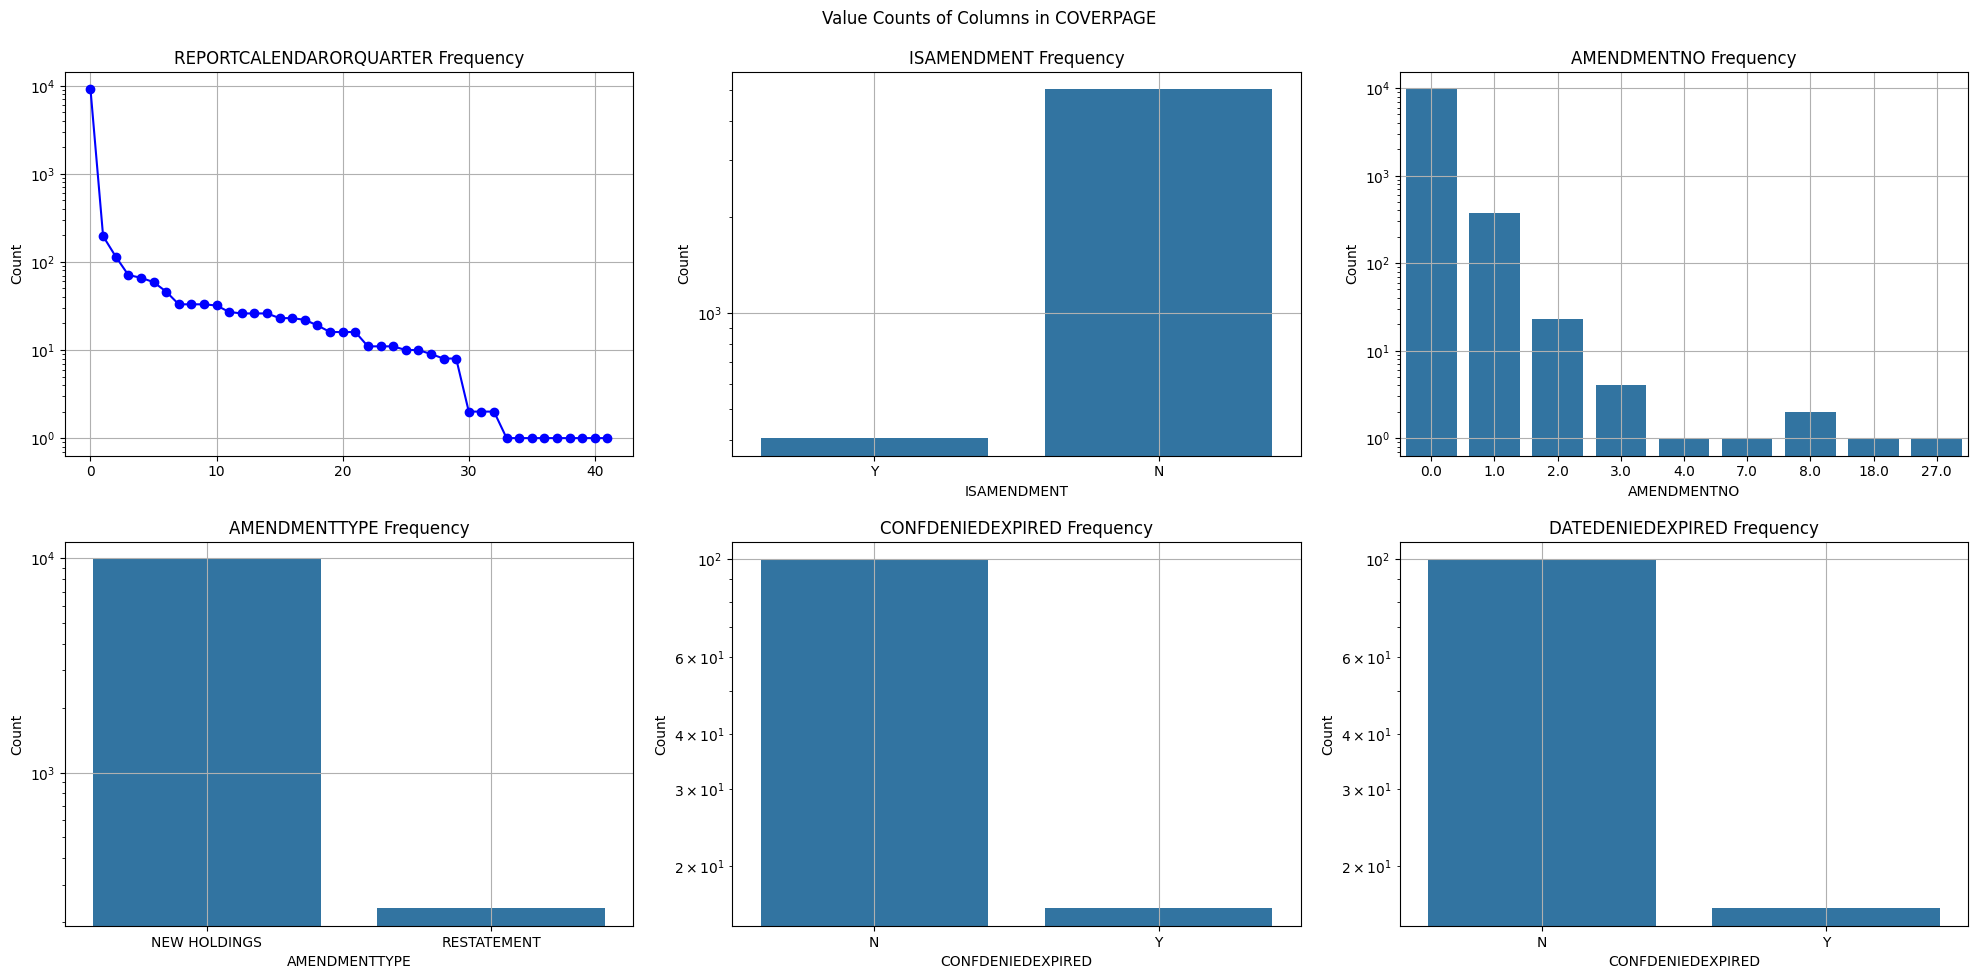

In [94]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

ax[0,0].plot(df_cover['REPORTCALENDARORQUARTER'].value_counts().values, 
             color='blue', linestyle='-', marker='o')
ax[0,0].set_yscale('log')
ax[0,0].set_title("REPORTCALENDARORQUARTER Frequency")
ax[0,0].set_ylabel("Count")
ax[0,0].grid(True)

sns.countplot(data=df_cover, x='ISAMENDMENT', ax=ax[0,1])
ax[0,1].set_yscale('log')
ax[0,1].set_title("ISAMENDMENT Frequency")
ax[0,1].set_ylabel("Count")
ax[0,1].grid(True)

sns.countplot(data=df_cover, x='AMENDMENTNO', ax=ax[0,2])
ax[0,2].set_yscale('log')
ax[0,2].set_title("AMENDMENTNO Frequency")
ax[0,2].grid(True)
ax[0,2].set_ylabel("Count")

sns.countplot(data=df_cover, x='AMENDMENTTYPE', ax=ax[1,0])
ax[1,0].set_yscale('log')
ax[1,0].set_title("AMENDMENTTYPE Frequency")
ax[1,0].set_ylabel("Count")
ax[1,0].grid(True)

sns.countplot(data=df_cover, x='CONFDENIEDEXPIRED', ax=ax[1,1])
ax[1,1].set_yscale('log')
ax[1,1].set_title("CONFDENIEDEXPIRED Frequency")
ax[1,1].set_ylabel("Count")
ax[1,1].grid(True)

sns.countplot(data=df_cover, x='CONFDENIEDEXPIRED', ax=ax[1,2])
ax[1,2].set_yscale('log')
ax[1,2].set_title("DATEDENIEDEXPIRED Frequency")
ax[1,2].set_ylabel("Count")
ax[1,2].grid(True)

plt.suptitle("Value Counts of Columns in COVERPAGE")
plt.tight_layout(pad=1.5)
plt.show()

<a id="summarypage"></a>

## Summarypage EDA

[Return to contents]( #contents)

- [**Summary**](#summarysummary)

- [**Missing Values**](#missingvaluessummary)

- [**Data Imbalance**](#imbalancesummary)

<a id="summarysummary"></a>

### Summary

In [95]:
print("Shape for Summarypage dataframe:")
print(df_summary.shape)

Shape for Summarypage dataframe:
(8244, 6)


In [96]:
print("Data types of the columns for Summarypage:")
print(df_summary.dtypes)

Data types of the columns for Summarypage:
ACCESSION_NUMBER              object
OTHERINCLUDEDMANAGERSCOUNT     int64
TABLEENTRYTOTAL                int64
TABLEVALUETOTAL                int64
ISCONFIDENTIALOMITTED         object
timestamp                     object
dtype: object


In [97]:
print("Descriptive statistics for numerical columns:")
print(df_summary.describe())

Descriptive statistics for numerical columns:
       OTHERINCLUDEDMANAGERSCOUNT  TABLEENTRYTOTAL  TABLEVALUETOTAL
count                 8244.000000      8244.000000     8.244000e+03
mean                     0.426371       792.687773     7.108208e+09
std                      2.111025     16643.253831     9.897344e+10
min                      0.000000         0.000000     0.000000e+00
25%                      0.000000        33.000000     1.368915e+08
50%                      0.000000        94.000000     3.001886e+08
75%                      0.000000       230.250000     9.427800e+08
max                     69.000000    992103.000000     5.205558e+12


In [98]:
print("Descriptive statistics for categorical columns:")
print(df_summary.describe(include=['object']))

Descriptive statistics for categorical columns:
            ACCESSION_NUMBER ISCONFIDENTIALOMITTED   timestamp
count                   8244                  5501        8244
unique                  8244                     2           1
top     0002035951-24-000001                     N  2023-10-01
freq                       1                  5387        8244


In [99]:
print("Number of missing values in each column of the summary page:")
print(df_summary.isna().sum())

Number of missing values in each column of the summary page:
ACCESSION_NUMBER                 0
OTHERINCLUDEDMANAGERSCOUNT       0
TABLEENTRYTOTAL                  0
TABLEVALUETOTAL                  0
ISCONFIDENTIALOMITTED         2743
timestamp                        0
dtype: int64


The only column with missing values is `ISCONFIDENTIALOMITTED`. This column is a boolean column that indicates whether the data is confidential. If the value is missing, we can assume that the data is not confidential.

In [100]:
df_summary['ISCONFIDENTIALOMITTED'] = df_summary['ISCONFIDENTIALOMITTED'].fillna('N/A')

## Data Cleaning and Augmentation<a id="data-cleaning"></a>
[Return to contents](#contents)

#### Remove rows from `db_info` that report "principal amount"

To keep analysis consistent, we are only looking at rows that report the number of shares.

In [101]:
df_info = df_info[df_info['SSHPRNAMTTYPE'] == 'SH']

#### Merge `df_summary` with `df_cover`

In [102]:
df_investor = df_cover.merge(df_summary, how='inner', on='ACCESSION_NUMBER')

#### Drop two rows whose values appear to be incorrect

For these rows, the number of shares (`SSHPRNAMT`) appears to be reported as an unreasonably high number whereas the `VALUE` appears to be unreasonably row. We will drop these rows. Two rows are negligible in the context of the entire dataset.

In [103]:
df_info = df_info[df_info['ACCESSION_NUMBER'] != '0001104659-24-089646']
df_info = df_info[df_info['ACCESSION_NUMBER'] != '0000894189-24-004736']

#### Ensure datatypes are correct

In [104]:
df_info['SSHPRNAMT'] = df_info['SSHPRNAMT'].astype(float)

#### Compute summary statistics for each institution (`ACCESSION_NUMBER`) in `df_info`.

In [105]:
s = df_info.groupby(by="ACCESSION_NUMBER")['VALUE'].mean()
s = s.rename("MEAN VALUE")
df_stats = s.to_frame()

In [106]:
df_stats['MIN VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].min()
df_stats['MAX VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].max()
df_stats['STD VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].std()
df_stats['25% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.25)
df_stats['50% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].median()
df_stats['75% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.75)
df_stats['10% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.10)
df_stats['90% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.90)
df_stats['99% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.99)
df_stats['01% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.01)

In [107]:
df_stats['MEAN SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].mean()
df_stats['MIN SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].min()
df_stats['MAX SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].max()
df_stats['STD SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].std()
df_stats['25% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.25)
df_stats['50% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].median()
df_stats['75% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.75)
df_stats['10% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.10)
df_stats['90% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.90)
df_stats['99% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.99)
df_stats['01% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.01)

In [108]:
df_stats = df_stats.reset_index()

#### Add feature for US vs. non-US institutions

In [109]:
state_df = pd.read_csv("XGBoost/state_list.csv")
state_set = set(list(state_df['Abbreviation']))
def UnitedStatesIndicator(x):
    # check if the location is in the US based on the state abbreviation
    return (x in state_set) 
df_investor['US_Indicator'] = df_investor['FILINGMANAGER_STATEORCOUNTRY'].apply(UnitedStatesIndicator)

#### Get full country/state name

In [110]:
# Initialize an empty dictionary
state_dict = {}
# Open the CSV file
with open('XGBoost/state_country_abbreviations.csv', mode='r') as file:
    reader = csv.reader(file,skipinitialspace = True)
    # Iterate through the rows in the file
    for row in reader:
        # Assign the first column as the key and the second column as the value
        state_dict[row[0]] = row[1]
        
def get_country_state(x):
    try: return state_dict[x]
    except KeyError: return np.nan
    
df_investor['State_Country_Full'] = df_investor['FILINGMANAGER_STATEORCOUNTRY'].apply(get_country_state)

#### Import US State GDP data

Additionally, we will add a column that indicates whther the institution is located in the United States.

In [111]:
df_state_gdp = pd.read_csv("XGBoost/state-gdp.csv")
df_state_gdp.columns.values

array(['State', 'Abbreviation', 'Region', '2022_MM', '2023_MM',
       '2023_Q4_Seasonally_Adjusted_MM', '2024_Q1_Seasonall_Adjusted_MM',
       '2024_Q2_Seasonall_Adjusted_MM',
       '2023_Percent_Change_From_Preceding_Period',
       '2024_Q1_Percent_Change_From_Preceding_Period',
       '2024_Q2_Percent_Change_From_Preceding_Period'], dtype=object)

In [112]:
df_ = df_investor['FILINGMANAGER_STATEORCOUNTRY'].value_counts().to_frame().reset_index()

df_state_gdp =df_state_gdp.merge(right=df_, how='inner',left_on = 'Abbreviation',right_on='FILINGMANAGER_STATEORCOUNTRY')

df_us = df_investor[df_investor['US_Indicator'] == True]

df_us2 = df_us.merge(
    right=df_state_gdp, 
    how='inner', 
    left_on = 'FILINGMANAGER_STATEORCOUNTRY', 
    right_on='Abbreviation')

#### Merge `df_stats` with `df_us2`

In [113]:
df_us2 = df_us2.merge(right=df_stats, how='inner',on='ACCESSION_NUMBER')

#### Get investor city

In [114]:
df_us2['FILINGMANAGER_CITY'] = df_us2['FILINGMANAGER_CITY'].str.lower()

In [115]:
df_us2['FILINGMANAGER_CITY'].value_counts()

FILINGMANAGER_CITY
new york              824
boston                192
chicago               179
san francisco         157
houston               109
                     ... 
sante fe                1
saint paul              1
indian rocks beach      1
kokomo                  1
kerrville               1
Name: count, Length: 1276, dtype: int64

#### Choose features

In [116]:
features = [
    'TABLEENTRYTOTAL',
    'TABLEVALUETOTAL',
    '2024_Q2_Seasonall_Adjusted_MM',
    '2024_Q2_Percent_Change_From_Preceding_Period',
    'MIN VALUE',
    'MAX VALUE',
    'MEAN VALUE',
    'STD VALUE',
    '25% VALUE',
    '50% VALUE',
    '75% VALUE',
    '01% VALUE',
    '99% VALUE',
    '10% VALUE',
    '90% VALUE',
    'MIN SHAMT',
    'MAX SHAMT',
    'MEAN SHAMT',
    'STD SHAMT',
    '25% SHAMT',
    '50% SHAMT',
    '75% SHAMT',
    '01% SHAMT',
    '99% SHAMT',
    '10% SHAMT',
    '90% SHAMT',
]

In [117]:
def get_log_feature(x):
    try: return np.log(x)
    except RuntimeWarning: return 0

In [118]:
log_features = [
    'LOG TABLEENTRYTOTAL',
    'LOG TABLEVALUETOTAL',
    'LOG 2024_Q2_Seasonall_Adjusted_MM',
    'LOG 2024_Q2_Percent_Change_From_Preceding_Period',
    'LOG MIN VALUE',
    'LOG MAX VALUE',
    'LOG MEAN VALUE',
    'LOG STD VALUE',
    'LOG 25% VALUE',
    'LOG 50% VALUE',
    'LOG 75% VALUE',
    'LOG 01% VALUE',
    'LOG 99% VALUE',
    'LOG 10% VALUE',
    'LOG 90% VALUE',
    'LOG MIN SHAMT',
    'LOG MAX SHAMT',
    'LOG MEAN SHAMT',
    'LOG STD SHAMT',
    'LOG 25% SHAMT',
    'LOG 50% SHAMT',
    'LOG 75% SHAMT',
    'LOG 01% SHAMT',
    'LOG 99% SHAMT',
    'LOG 10% SHAMT',
    'LOG 90% SHAMT',
]

In [119]:
for i, log_feature in enumerate(log_features):
    df_us2[log_feature] = df_us2[features[i]].apply(get_log_feature)
feature_list = log_features
feature_list.append('OTHERINCLUDEDMANAGERSCOUNT')
df_starlog = df_us2[log_features]
df_star = df_us2[features]
df_star.to_csv("df_star.csv")

## Data Visualization and Insights <a name="data-visualization"></a>

#### Average value of securities held by institution

Each institutional investor holds a porfolio of securities that are reported on Form 13F. Each security is held in given quantity at a given value. We can compute the average value of securities held by each institution. Note that on Form 13F, the total value of the securities is reported, not the price of one share.

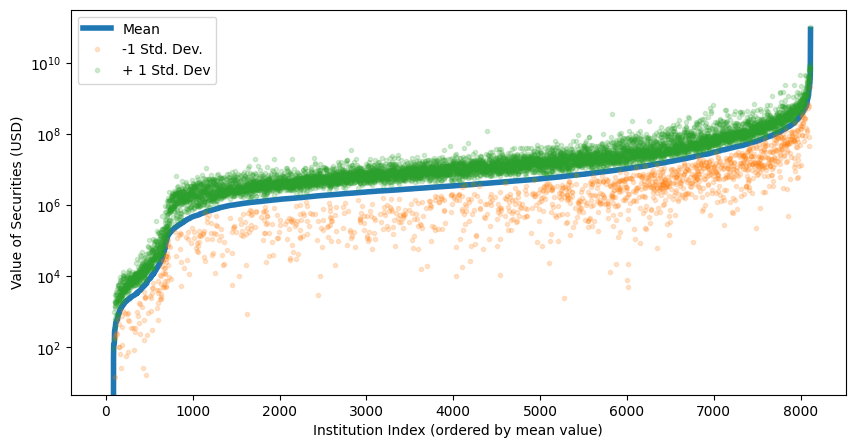

In [120]:
df_stats_sorted = df_stats.sort_values(by="MEAN VALUE")
x = np.arange(len(df_stats_sorted))
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(x, df_stats_sorted['MEAN VALUE'], label='Mean',linewidth=4)
ax.plot(x, df_stats_sorted['MEAN VALUE'] - df_stats_sorted['STD VALUE'],'.', alpha=0.2,label='-1 Std. Dev.')
ax.plot(x, df_stats_sorted['MEAN VALUE'] + df_stats_sorted['STD VALUE'],'.', alpha=0.2, label='+ 1 Std. Dev')
ax.set_ylabel("Value of Securities (USD)")
ax.legend()
ax.set_xlabel("Institution Index (ordered by mean value)")
ax.set_yscale("log")

#### State GDP vs. Number of Investors per State

Here, each data point represents an indvidual state. States with higher GDPs have more investors. This is not surprising as states with higher GDPs have more economic activity and thus more investors.

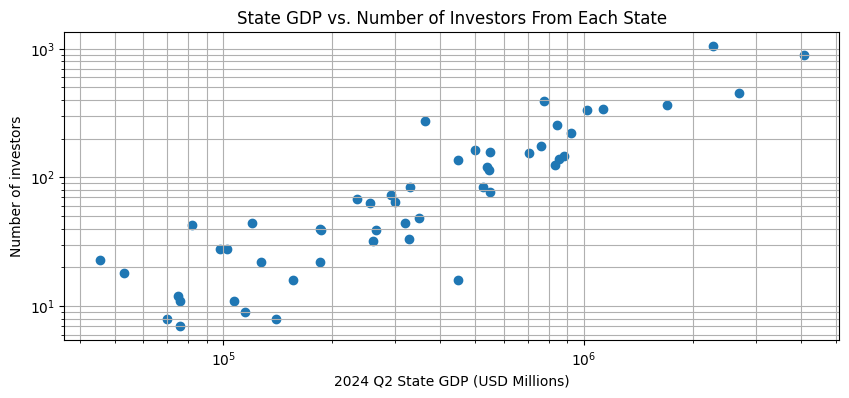

In [121]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.scatter(df_state_gdp['2024_Q2_Seasonall_Adjusted_MM'], df_state_gdp['count'])
ax.set_xscale('log')
ax.set_xlabel("2024 Q2 State GDP (USD Millions)")
ax.set_ylabel("Number of investors")
ax.grid(True,which='both')
ax.set_yscale('log')
ax.set_title("State GDP vs. Number of Investors From Each State")
plt.show()

### Numerical Correlations with `TOTAL_VALUE`

#### Correlating `TOTAL_VALUE` with the summary statistics of the `VALUE` column in `df_info`.

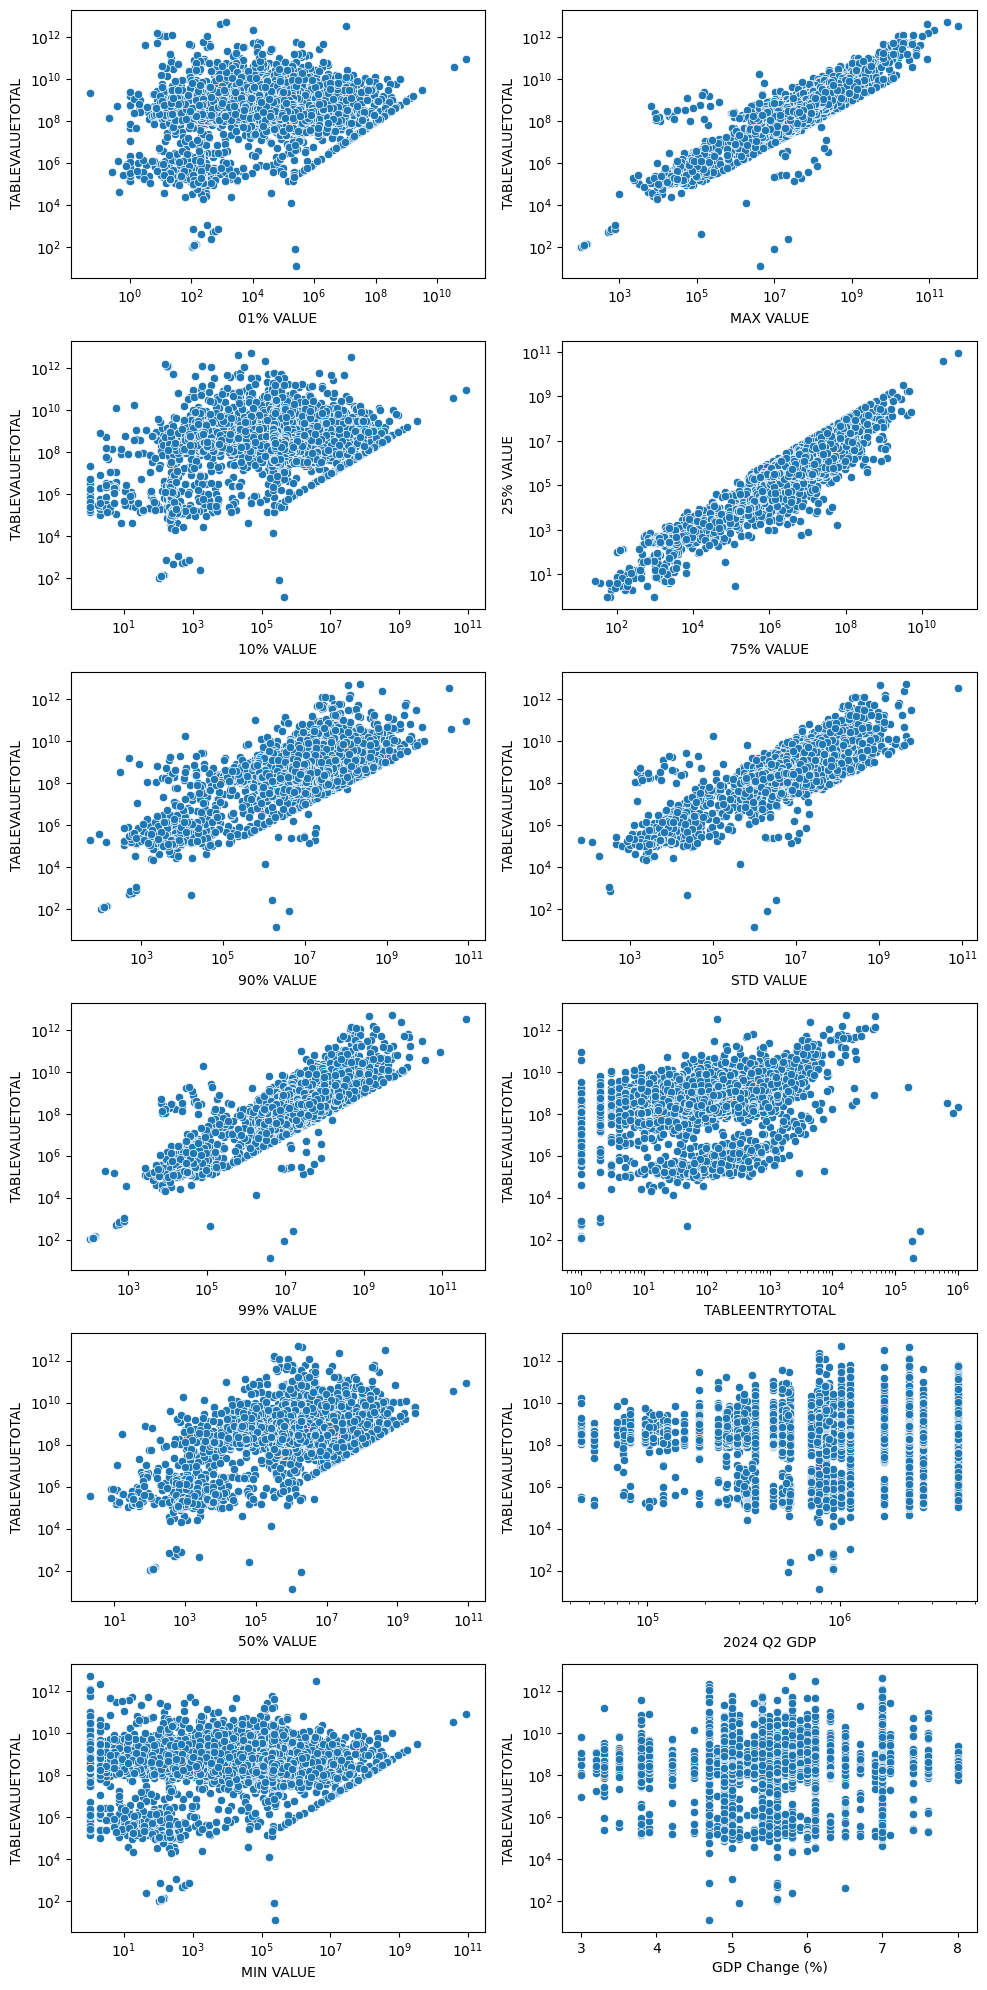

In [122]:
fig, ax = plt.subplots(6,2,figsize=(10,20))
a1 = ax[0,0]
a2 = ax[1,0]
a3 = ax[2,0]

a4 = ax[3,0]
a5 = ax[4,0]
a6 = ax[5,0]

a7 = ax[0,1]
a8 = ax[1,1]
a9 = ax[2,1]

a10 = ax[3,1]
a11 = ax[4,1]
a12 = ax[5,1]

# a1 = ax
sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '01% VALUE', ax = a1)
a1.set_xscale("log"), a1.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '10% VALUE', ax = a2)
a2.set_xscale("log"), a2.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '90% VALUE', ax = a3)
a3.set_xscale("log"), a3.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '99% VALUE', ax = a4)
a4.set_xscale("log"), a4.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '50% VALUE', ax = a5)
a5.set_xscale("log"), a5.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MIN VALUE', ax = a6)
a6.set_xscale("log"), a6.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MAX VALUE', ax = a7)
a7.set_xscale("log"), a7.set_yscale("log")

sns.scatterplot(data = df_star, y = '25% VALUE', x = '75% VALUE', ax = a8)
a8.set_xscale("log"), a8.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'STD VALUE', ax = a9)
a9.set_xscale("log"), a9.set_yscale("log")

sns.scatterplot(data = df_star, x = 'TABLEENTRYTOTAL', y = 'TABLEVALUETOTAL', ax = a10)
a10.set_xscale("log"), a10.set_yscale("log")

sns.scatterplot(data = df_star, x = '2024_Q2_Seasonall_Adjusted_MM', y = 'TABLEVALUETOTAL', ax = a11)
a11.set_xscale("log"), a11.set_yscale("log")
a11.set_xlabel("2024 Q2 GDP")

sns.scatterplot(data = df_star, x = '2024_Q2_Percent_Change_From_Preceding_Period', y = 'TABLEVALUETOTAL', ax = a12)
a12.set_xlabel("GDP Change (%)")
# ax.set_xscale("log")
a12.set_yscale("log")
plt.tight_layout()
plt.show()

#### Correlating `TOTAL_VALUE` with the summary statistics of the `SSHPRNAMT` column in `df_info`.

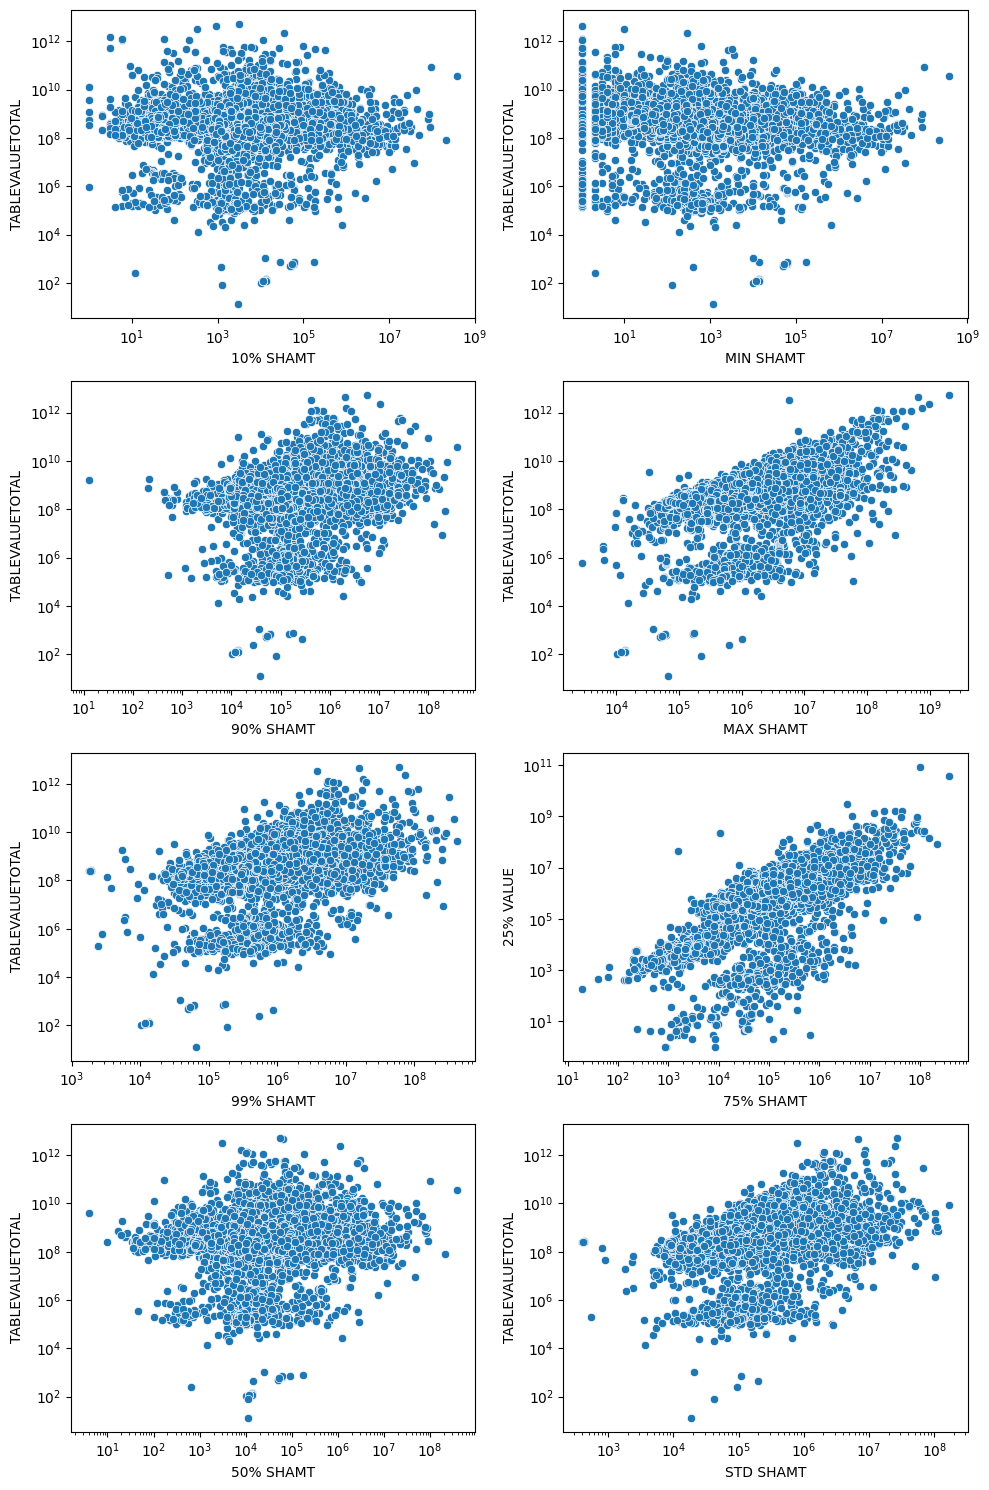

In [123]:
# fig, ax = plt.subplots(1,1,figsize=(6,3))
fig, ax = plt.subplots(4,2,figsize=(10,15))

a2 = ax[0,0]
a3 = ax[1,0]
a4 = ax[2,0]
a5 = ax[3,0]

a6 = ax[0,1]
a7 = ax[1,1]
a8 = ax[2,1]
a9 = ax[3,1]

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '10% SHAMT', ax = a2)
a2.set_xscale("log"), a2.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '90% SHAMT', ax = a3)
a3.set_xscale("log"), a3.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '99% SHAMT', ax = a4)
a4.set_xscale("log"), a4.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '50% SHAMT', ax = a5)
a5.set_xscale("log"), a5.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MIN SHAMT', ax = a6)
a6.set_xscale("log"), a6.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MAX SHAMT', ax = a7)
a7.set_xscale("log"), a7.set_yscale("log")

sns.scatterplot(data = df_star, y = '25% VALUE', x = '75% SHAMT', ax = a8)
a8.set_xscale("log"), a8.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'STD SHAMT', ax = a9)
a9.set_xscale("log"), a9.set_yscale("log")

plt.tight_layout()
plt.show()

In [124]:
df_starlog1 = df_starlog[[
    'LOG TABLEVALUETOTAL',
    'LOG MIN SHAMT',
    'LOG MAX SHAMT',
    'LOG MEAN SHAMT',
    'LOG STD SHAMT',
    'LOG 25% SHAMT',
    'LOG 50% SHAMT',
    'LOG 75% SHAMT',
    'LOG 01% SHAMT',
    'LOG 99% SHAMT',
    'LOG 10% SHAMT',
    'LOG 90% SHAMT']]

df_starlog2 = df_starlog[[
    'LOG TABLEVALUETOTAL',
    'LOG MIN VALUE',
    'LOG MAX VALUE',
    'LOG MEAN VALUE',
    'LOG STD VALUE',
    'LOG 25% VALUE',
    'LOG 50% VALUE',
    'LOG 75% VALUE',
    'LOG 01% VALUE',
    'LOG 99% VALUE',
    'LOG 10% VALUE',
    'LOG 90% VALUE',
]]
corr =  df_starlog2.corr()

<Axes: >

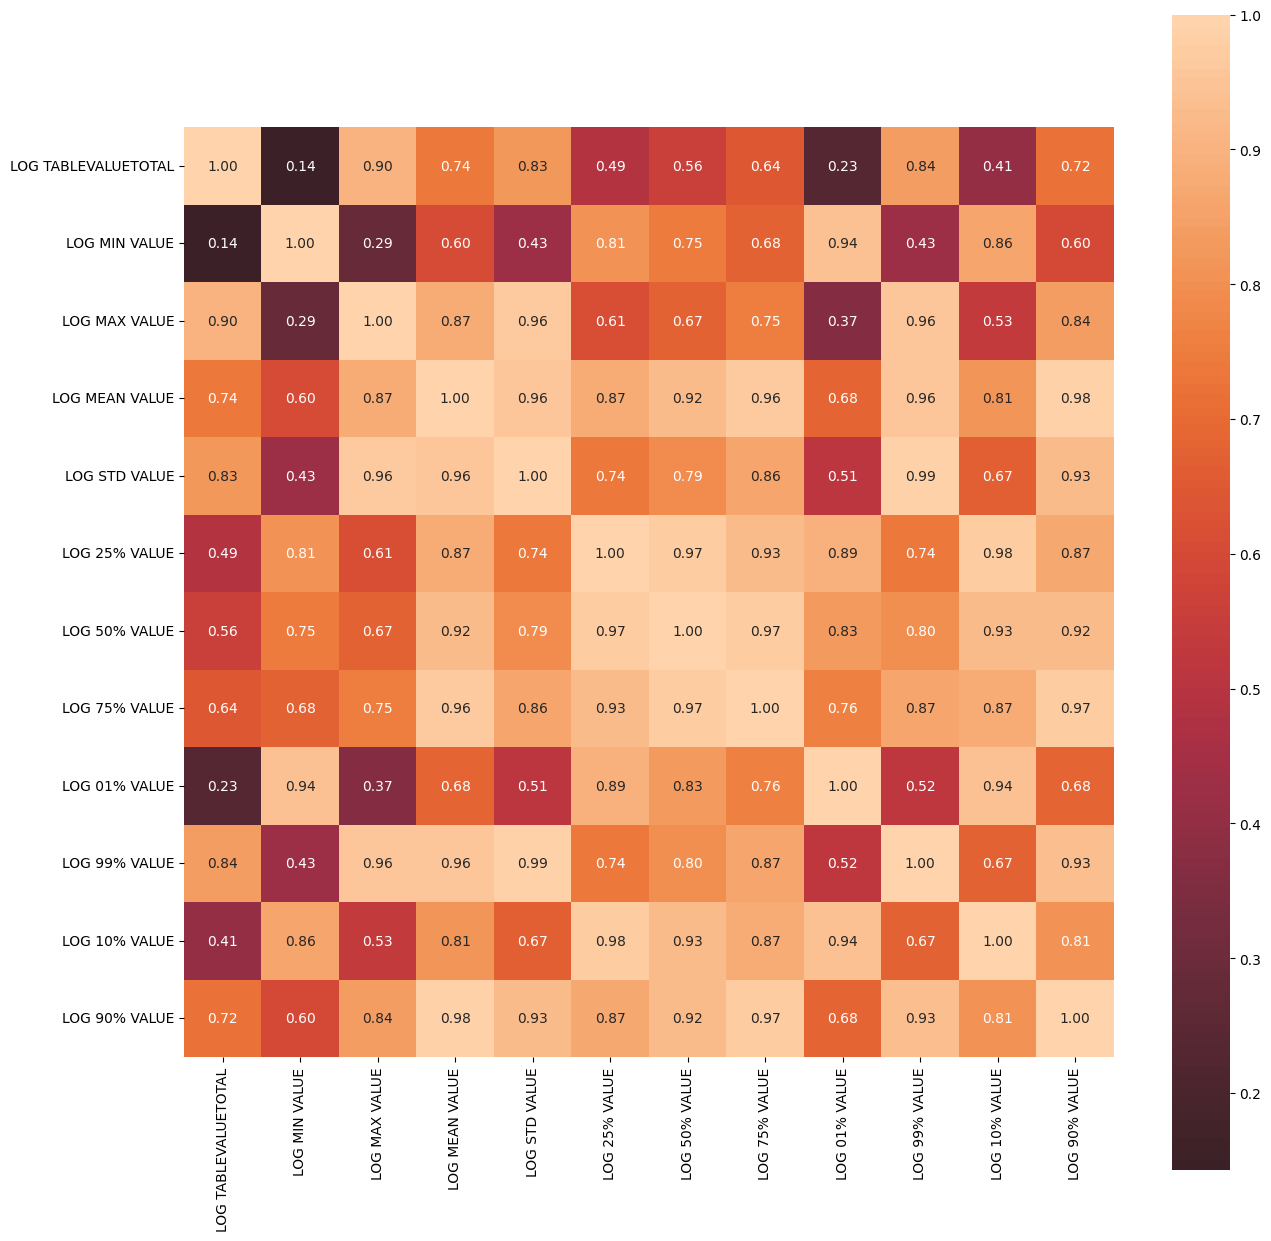

In [125]:

plt.figure(figsize=(15, 15))
sns.heatmap(corr, center=0, annot=True,fmt='.2f', square=True)

#### Heatmap of correlations with logathmically transformed features.

#### TF Comments from MS3: "Additionally a few more findings could have been highlighted from the correlations observed between the predictor and the summary statistics of variables and also how these plots help you choose your final predictors." 

#### Answer to tf's Comment:

#### **1. Key Correlations Observed**
- **VALUE Summary Statistics**:
  - Positive correlations were observed between the summary statistics of `VALUE` (e.g., mean, maximum, percentiles) and the target variable (`TABLEVALUETOTAL`).
  - **Reasoning**: 
    - These metrics capture the distribution of individual security values, reflecting an investor's overall portfolio structure.
    - Including features like `LOG MEAN VALUE` and `LOG MAX VALUE` helps the model capture the central tendency and extreme holdings of securities.

- **SSHPRNAMT Summary Statistics**:
  - Positive correlations were also observed between the summary statistics of `SSHPRNAMT` (e.g., standard deviation, percentiles) and the target.
  - **Reasoning**:
    - Features like `LOG STD SHAMT` and `LOG MAX SHAMT` quantify the diversity in share amounts held, indicating an investor's risk profile and strategy.
    - Higher variance or extreme values in shares held often correspond to larger portfolios, making these features predictive.

- **State GDP**:
  - A significant correlation between state GDP and the number of investors in each state was noted.
  - **Reasoning**:
    - Higher state GDP implies a concentration of large institutional investors. Including state-level GDP as a predictor (`2024 Q2 GDP`) helps account for geographic economic influence on portfolio size.

---

#### **2. Heatmap Insights for Feature Selection**
- The heatmap depicted correlations between `TABLEVALUETOTAL` and the summary statistics of `VALUE` and `SSHPRNAMT`:
  - High correlations for `LOG MAX VALUE`, `LOG MEAN VALUE`, and `LOG STD VALUE` indicate their predictive strength.
  - Similarly, `LOG MAX SHAMT` and `LOG STD SHAMT` are strong predictors due to their correlation with `TABLEVALUETOTAL`.

- **How It Helps**:
  - The heatmap aids in identifying features that contribute the most to the variability in the target variable.
  - Features with weak correlations can be excluded, reducing model complexity without losing predictive power.

---

#### **3. Findings from Scatter Plots**
- Scatter plots of summary statistics (percentiles, mean, and max) against `TABLEVALUETOTAL` highlighted:
  - Linear relationships post-log transformation, justifying the choice of log-transformed features in the model.
  - Outliers in certain investors’ data, which may require handling (e.g., removal or robust regression methods).

- **How It Helps**:
  - Scatter plots validate the appropriateness of features by visually confirming their relationship with the target variable.
  - These plots guide feature engineering, such as applying transformations (e.g., logarithm) or considering interaction terms (e.g., combining `VALUE` and `SSHPRNAMT`).

---

#### **4. Geographic Insights**
- The correlation between state GDP and the number of investors:
  - Provides an additional dimension for modeling, connecting regional economic indicators with institutional asset values.
  - This feature could capture macroeconomic trends influencing the portfolio sizes of investors from different regions.

---

### **Summary**
The findings from the correlations and visualizations assist in:
- Selecting final predictors that are both meaningful and strongly correlated with the target variable.
- Justifying the use of log transformations to linearize relationships and improve model interpretability.
- Enhancing the model’s performance by incorporating features derived from meaningful summary statistics and macroeconomic variables. 

Future iterations can explore interactions between these predictors or use feature importance metrics from advanced models to further refine the selection.

# <a id='toc1_3_'></a>[Base Models](#toc0_)

In [126]:

df_starlog = df_starlog.replace([np.inf, -np.inf], np.nan, inplace=False).dropna(how="all", inplace=False)
feature_subset = [
    'LOG MAX SHAMT',
    'LOG STD SHAMT',
    'LOG STD VALUE',
    'LOG MEAN VALUE',
    'LOG MAX VALUE',
    'LOG MIN VALUE'
]
X = df_starlog.drop(columns=['LOG TABLEVALUETOTAL'])
y = df_starlog['LOG TABLEVALUETOTAL']

In [127]:
X = X[~y.isna()]  # Keep only rows where y is not NaN
y = y.dropna()    # Drop the rows where y is NaN

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Dataset Assembly

In [129]:
assemble_dataset().to_csv(f'{main_path}/encoded_data.csv', index=False)

### Data Processing and Feature Engineering

In [130]:
df = pd.read_csv("../data/2024q3/encoded_data.csv")
features = [x for x in df.columns.values if x != 'TABLEVALUETOTAL']
X = df[features]
y = df['TABLEVALUETOTAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True)

print("Train/test split complete.")
X_train, X_test, y_train, y_test = process_dataset(X_train, X_test, y_train, y_test)

# Save to CSV files
X_train.to_csv("../data/2024q3/X_train.csv", index=False)
X_test.to_csv("../data/2024q3/X_test.csv", index=False)
y_train.to_csv("../data/2024q3/y_train.csv", index=False)
y_test.to_csv("../data/2024q3/y_test.csv", index=False)

Train/test split complete.


In [131]:
# Optionally: select a subset of features
feature_subset = [
    'MAX SHAMT','STD SHAMT','STD VALUE',
    'MEAN VALUE','MAX VALUE','MIN VALUE']
X_train = X_train[feature_subset]
X_test = X_test[feature_subset]

# <a id='toc1_3_1_'></a>[Linear Regression](#toc0_)

In [132]:
mean_score, std_score, coefficients, intercept, y_pred_train, y_pred_test = implement_linear_regression(
    X_train, y_train, X_test, y_test, k=5)

print(f"Mean R^2 score: {mean_score}")
print(f"Standard deviation of R^2 score: {std_score}")

# Evaluate on the training set using cross-validated predictions
train_r2, train_mse = get_performance_metrics(y_train, y_pred_train)
test_r2, test_mse = get_performance_metrics(y_test, y_pred_test)

print(f"Training R^2 score (cross-validated): {train_r2}")
print(f"Training MSE (cross-validated): {train_mse}")

print(f"Test MSE: {test_mse}")
print(f"Test R^2 score: {test_r2}")

linreg_train_mse = train_mse
linreg_test_mse = test_mse
linreg_train_r2 = train_r2
linreg_test_r2 = test_r2

Mean R^2 score: 0.47052181472830223
Standard deviation of R^2 score: 0.03231436028056435
Training R^2 score (cross-validated): 0.4744153033075763
Training MSE (cross-validated): 13.627429189297334
Test MSE: 13.632928595808606
Test R^2 score: 0.5092669144819895


# <a id='toc1_3_2_'></a>[Decision Tree](#toc0_)

In [133]:
mean_score, std_score, feature_importances, y_pred_train, y_pred_test = implement_decision_tree(
        X_train, y_train, X_test, y_test, max_depth=10, min_samples_split=2, k=5
    )
    
print(f"Mean R^2 score: {mean_score}")
print(f"Standard deviation of R^2 score: {std_score}")

# Evaluate metrics
train_r2, train_mse = get_performance_metrics(y_train, y_pred_train)
test_r2, test_mse = get_performance_metrics(y_test, y_pred_test)

print(f"Training R^2 score: {train_r2}")
print(f"Training MSE: {train_mse}")
print(f"Test R^2 score: {test_r2}")
print(f"Test MSE: {test_mse}")

# Print feature importances
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

dt_train_mse = train_mse
dt_test_mse = test_mse
dt_train_r2 = train_r2
dt_test_r2 = test_r2

Mean R^2 score: 0.9023425807544598
Standard deviation of R^2 score: 0.03583444107549819
Training R^2 score: 0.9454763687565761
Training MSE: 1.413695886864715
Test R^2 score: 0.8686638121658411
Test MSE: 3.648616577174073

Feature Importances:
      feature  importance
4   MAX VALUE    0.518551
5   MIN VALUE    0.455639
3  MEAN VALUE    0.008400
1   STD SHAMT    0.006701
0   MAX SHAMT    0.006239
2   STD VALUE    0.004470


# <a id='toc1_3_3_'></a>[Random Forest](#toc0_)

In [134]:
mean_score, std_score, feature_importances, y_pred_train, y_pred_test = implement_random_forest(
        X_train, y_train, X_test, y_test, 
        n_estimators=100,
        max_depth=10, 
        min_samples_split=2, 
        k=5
    )
    
print(f"Mean R^2 score: {mean_score}")
print(f"Standard deviation of R^2 score: {std_score}")

# Evaluate metrics
train_r2, train_mse = get_performance_metrics(y_train, y_pred_train)
test_r2, test_mse = get_performance_metrics(y_test, y_pred_test)

print(f"Training R^2 score: {train_r2}")
print(f"Training MSE: {train_mse}")
print(f"Test R^2 score: {test_r2}")
print(f"Test MSE: {test_mse}")

# Print feature importances
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

rf_train_mse = train_mse
rf_test_mse = test_mse
rf_train_r2 = train_r2
rf_test_r2 = test_r2

Mean R^2 score: 0.9178941923121895
Standard deviation of R^2 score: 0.03716831615238755
Training R^2 score: 0.9480285184354799
Training MSE: 1.34752341409559
Test R^2 score: 0.8958950291573143
Test MSE: 2.8921131993147053

Feature Importances:
      feature  importance
4   MAX VALUE    0.502677
5   MIN VALUE    0.457808
3  MEAN VALUE    0.019672
0   MAX SHAMT    0.008626
1   STD SHAMT    0.006236
2   STD VALUE    0.004980


# <a id='toc1_3_4_'></a>[XGBoost](#toc0_)

## XGBoost Description

XGBoost stands for Extreme Gradient Boosting which is a scalable, distributed gradient boosting decision tree machine learning method. First, we learned gradient boosting is a boosting method which additvely generates 'weak learners' and utilizes a gradient descent algorithm to create an ensemble, stronger model. Targeted outcomes for each subsequent tree in this method is based on the errors/residuals of the previous model, creating a new model based on the residuals of the previous model.

Now, XGBoost is similar to Gradient Boosting in the sense that it builds an ensemble of weak learners sequentially, where the subsequent models would correct the errors of the previous model by minimizing a loss function using a gradient descent like procedure. XGBoost has several notable improvements and changes compared to this method however:

- Regularization/Shrinkage

XGBoost incorporates both L1 (Lasso) and L2 (Ridge) Regularization terms in the objective/loss function. Similar to other regression techniques such as linear or logistic regression, these regularization parameters help to prevent overfitting by penalizing overly complex models and makes the final ensemble more robust. The L1 regularization can push leaf weights to 0, similar to lasso in linear regression and can remove features from the model entirely which can be seen as feature selection. In our case, the loss function is the mean squared error.

\begin{align*}
L = \sum_{i=1}^N L(y_i, \hat{y_i}) + \lambda \sum_{t=1}^T w_t^2 + \alpha \sum_{t=1}^T |w_T|
\end{align*}

Where $\lambda$ is the L2 regularization parameter and $\alpha$ is the L1 regularization parameter. The first Loss is summed over all training examples, the MSE. The second and third sum represent the regularization term applied to the weights of the leaves in the decision trees, summing over all the T trees in the ensemble.

- Parallelization

XGBoost can parallelize the tree building process, but this doesn't mean training multiple trees in parallel but rather finding the optimal splits within each tree. It parallelizes the computation of splits for each node in the tree, when we find the best possible split at each node we have to evaluate every feature at different feature thresholds to find which to split on. Instead of checking ont at a time, XGBoost performs this in parallel, meaning it evaluates multiple splits at the same time which speeds up the process of finding the best split.

- Tree Pruning

XGBoost uses depth-first growth rather than the traditional level order we discussed in class regarding single decision trees. The tree is growth depth-first, it makes all of the splits along one path for a branch first before moving to the next branch. This helps to improve the computation performance of the algorithm.

- Feature Importance

We can easily extract the feature importance from XGBoost models, in contrast to Gradient Boosting models which require external steps.



Some resources we used to find this information:

https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

https://medium.com/@dakshrathi/regularization-in-xgboost-with-9-hyperparameters-ce521784dca7#:~:text=Regularization%20in%20XGBoost%20helps%20mitigate,tailored%20to%20the%20training%20data.

https://gabrieltseng.github.io/posts/2018-02-25-XGB/

## The Algorithm:

XGBoost starts with a simple model, such as a stump or depth 2 decision tree. It adds decision trees sequentially in the same manner as Gradient Boosting, where the second tree will try to correct the mistakes from the initial model's residuals. Trees are added sequentially to the model, every tree trying to correct the residuals of the previous model. As stated previously, XGBoost uses a depth-first tree growth growing one branch at a time before the next node, but if the trees are stumps it is essentially the same as level-order growth.

The objective function in XGBoost is made up of 2 parts, a loss function to measure how far off the model's predictions are from the true values, and the regularizaiton term to prevent the model from overfitting by penalizing overly complex trees. The XGBoost algorithm wants to minimize this objective function in training the model, it attempts to both reduce the loss in the current tree by improving predictions on the training data and keep model complexity low. At each split, the algorithm will look for the best feature to split and minimize the objective function, considering both reduction in the loss function and complexity penalty.

The XGBoost algorithm uses a depth-first tree growth, exploring one branch fully before moving to the next. The algorithm stops once some maximum number of estimators/trees is reached, in which case the final model is created based on the combination of all previous models.

For the XGBoost model we experiment with several different features to use in the GridSearch. First, we set the n_estimators argument and give it 5 possible values, 100, 200, 300, 500, and 700. This parameter will control the number of trees, in our case stumps, produced in the model. More trees could cause overfitting and allow the model to learn more complex patterns in the data, so we limited the number of trees instead of using too many. However, one could consider values such as 500 or 700 a lot, but with lower learning rates a greater number of trees would be necessary.

The learning rate parameter we chose to be a set value rather than adaptive, but we select the learning rate based on cross validation. We understand that a lower learning rate makes it so that the model requires more trees to fully converge, but could be more precise and prevent overfitting. We didn't choose an extremely high learning rate since as we saw in class for other algorithms such as Gradient Boosting a higher learning rate could cause the algorithm to diverge which we would like to avoid.

As for max depth we decided to experiment with 2 values, 1 and 2. A max depth of 1 would essentially be training over stumps with 1 depth, similar to what we did in class. On the other hand, a max depth of 2 adds one more layer to this tree. We decided to use these 2 values and not go any higher since these Boosting algorithms work well with "weak-learners" meaning in our case trees of lower depths rather than overly large trees, since the smaller trees have lower bias and improve its accuracy overtime as more trees are added to the model.

We decided to use the same 4 parameters for both alpha and lambda, the regularization parameters. This is a key difference compared to other Boosting algorithms, such as Gradient Boosting which doesn't use regularization. The alpha represents the L1 regularization term for Lasso, adding a penalty based on the absolute value of leaf weights, while the lambda is the L2 regularization term for Ridge, which adds a penalty based on the squared values of leaf weights.

In [135]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [1, 2], 
    'alpha': [0, 0.001, 0.01, 0.1], 
    'lambda': [0, 0.001, 0.01, 0.1]     
}


We now create the model using grid search and observe what the best parameters were

In [136]:
cv = KFold(n_splits=5, shuffle=True, random_state=109)

# Create the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=cv, 
                           verbose=0, 
                           n_jobs=-1, 
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'alpha': 0.001,
 'lambda': 0.001,
 'learning_rate': 0.2,
 'max_depth': 2,
 'n_estimators': 700}

Next, we can split the training data into a train and validation set. We saw the optimal number of estimators found was 700, but potentially the actual validation MSE is found at a smaller number of estimators. To investigate this, we split the train data into this train/validation split (80% train) and use an evaluation set which is similar to the "staged_score" in AdaBoosting to calculate the train/val RMSE at each estimator/tree.

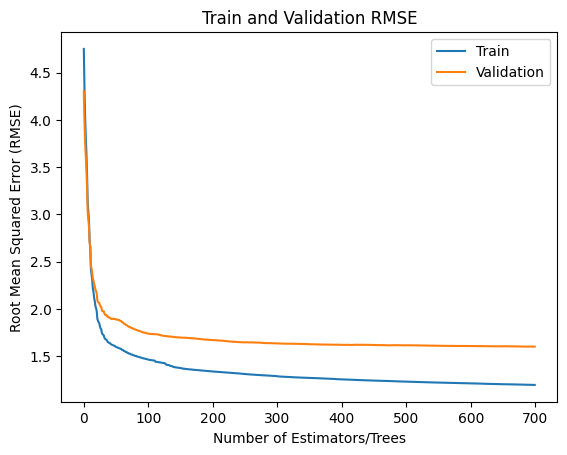

In [137]:
X_train80, X_val, y_train80, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

eval_set = [(X_train80, y_train80), (X_val, y_val)]

eval_results = grid_search.best_estimator_.fit(X_train80, y_train80, eval_set = eval_set, verbose=False)

eval_results = grid_search.best_estimator_.evals_result()

train_rmse = eval_results['validation_0']['rmse']
val_rmse = eval_results['validation_1']['rmse']

plt.plot(train_rmse, label='Train')
plt.plot(val_rmse, label='Validation')

plt.title('Train and Validation RMSE')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Estimators/Trees')
plt.legend()
plt.show()

Lowest validation RMSE:

In [138]:
np.argmin(val_rmse)

np.int64(697)

We see the lowest validation RMSE was actually at 634 estimators, so we can set this to be the new number of estimators alongside the other best parameters we found in grid search from earlier.

In [139]:
best_params = grid_search.best_params_
#del best_params['n_estimators']

final_model = xgb.XGBRegressor(**best_params)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

test_mse = mean_squared_error(y_test, y_pred)  
test_r2 = r2_score(y_test, y_pred)
y_pred_train = final_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE) on Training Data: {train_mse}")
print(f"Mean Squared Error (MSE) on Test Data: {test_mse}")
print(f"R-squared (R²) on Test Data: {test_r2}")
print(f"R-squared (R²) on Training Data: {train_r2}")

Mean Squared Error (MSE) on Training Data: 1.6750279821686693
Mean Squared Error (MSE) on Test Data: 2.8056956245573175
R-squared (R²) on Test Data: 0.8990057300463892
R-squared (R²) on Training Data: 0.9353972740030185


In [140]:
xgboost_train_mse = train_mse
xgboost_test_mse = test_mse
xgboost_train_r2 = train_r2
xgboost_test_r2 = test_r2

# <a id='toc1_3_5_'></a>[Time Series](#toc0_)

In [147]:
if os.path.exists("infotable_dataset.csv"):
    infotable_dataset = pd.read_csv("infotable_dataset.csv", low_memory=False)
else:
    file_paths = [
        'INFOTABLE_2023q4.tsv',
        'INFOTABLE_2023q3.tsv'
    ]

    dataframes = []
    for file_path in file_paths:
        year_quarter = file_path.split('_')[1].split('.')[0]
        year = int(year_quarter[:4])
        quarter = int(year_quarter[4:].replace("q", ""))
        df = pd.read_csv(file_path, delimiter='\t', low_memory=False)
        df.rename(columns={'ACCESSION_NUMBER': 'investor'}, inplace=True)
        if quarter == 1:
            df['timestamp'] = pd.Timestamp(year, 1, 1)  # Q1: January 1st
        elif quarter == 2:
            df['timestamp'] = pd.Timestamp(year, 4, 1)  # Q2: April 1st
        elif quarter == 3:
            df['timestamp'] = pd.Timestamp(year, 7, 1)  # Q3: July 1st
        elif quarter == 4:
            df['timestamp'] = pd.Timestamp(year, 10, 1)  # Q4: October 1st

        dataframes.append(df)
        

    infotable_dataset = pd.concat(dataframes, ignore_index=True)

    infotable_dataset.to_csv("infotable_dataset.csv", index=False)

### Scaling Without Time Series Cross-Validation

Since we currently only have data for one quarter, there is no temporal pattern or chronological dependency to consider. This allows us to perform **Standardization** (Z-score scaling) across the entire dataset for this quarter without introducing bias from future data. Standardization transforms each feature to have a mean of 0 and a standard deviation of 1, making the scale of all features comparable.

In [148]:
numeric_features = ['VALUE', 'SSHPRNAMT', 'VOTING_AUTH_SOLE', 'VOTING_AUTH_SHARED', 'VOTING_AUTH_NONE']

scaler = StandardScaler()

infotable_dataset_standardized = infotable_dataset.copy()
infotable_dataset_standardized[numeric_features] = scaler.fit_transform(infotable_dataset[numeric_features])

print(infotable_dataset_standardized[numeric_features].head())

      VALUE  SSHPRNAMT  VOTING_AUTH_SOLE  VOTING_AUTH_SHARED  VOTING_AUTH_NONE
0 -0.038142  -0.032628         -0.026317           -0.025341         -0.015885
1  0.099572   0.004316          0.018649           -0.025341         -0.012671
2 -0.021993  -0.032612         -0.026398           -0.025341         -0.015762
3 -0.036201  -0.031953         -0.025688           -0.025341         -0.015595
4 -0.041501  -0.033183         -0.027188           -0.025341         -0.015698


### Problem Statement

The task involves predicting the **total value of assets held by institutional investors** based on specific features related to individual holdings. The problem is framed as a regression problem, with the following objectives:

- **Goal**: To develop a predictive model that estimates the total value (`VALUE`) of an investor's holdings using features such as:
  - Number of shares held (`SSHPRNAMT`).
  - Voting authority metrics (`VOTING_AUTH_SOLE`, `VOTING_AUTH_SHARED`, `VOTING_AUTH_NONE`).
- **Dataset Structure**:
  - The dataset includes quarterly data over multiple years, with a timestamp for each record.
  - Features include categorical information (e.g., `TITLEOFCLASS`, `CUSIP`), numerical data (e.g., `VALUE`, `SSHPRNAMT`), and timestamps.
  - Missing values in specific columns are handled through imputation or categorical assignment.
- **Challenges**:
  - Avoiding **data leakage** when using multiple time periods for modeling.
  - Ensuring that predictions are unbiased and do not rely on future data during training.
- **Key Requirements**:
  - Proper handling of time-series data to maintain chronological order during model training and evaluation.
  - Use of **Time Series Cross-Validation** to ensure the model's robustness and reliability across different time periods.
  - Scaling features within each fold of cross-validation to prevent information from leaking between training and testing datasets.


In [149]:
log_transformed_features = ['SSHPRNAMT', 'VOTING_AUTH_SOLE', 'VOTING_AUTH_SHARED', 'VOTING_AUTH_NONE']
log_transformed_target = 'VALUE'

infotable_dataset[log_transformed_features] = infotable_dataset[log_transformed_features].apply(lambda x: np.log1p(x))
infotable_dataset[log_transformed_target] = np.log1p(infotable_dataset[log_transformed_target])

X = infotable_dataset[log_transformed_features].values
y = infotable_dataset[log_transformed_target].values

print("Log transformation applied to input features and target.")
print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target vector y: {y.shape}")

Log transformation applied to input features and target.
Shape of feature matrix X: (5610507, 4)
Shape of target vector y: (5610507,)


### Scaling With Time Series Cross-Validation

As we move to the next milestone, we plan to add multiple quarters over 5+ years to create a comprehensive dataset with chronological data. When using this data for **Time Series Cross-Validation**, we must account for the temporal order to avoid data leakage, where future information might inadvertently influence the past. If we apply a global scaling approach across the whole dataset, it would incorporate information from future quarters, leading to optimistic results and bias.

To avoid this, we will apply **Standardization separately in each fold** of the cross-validation process. By standardizing data independently within each training fold, we ensure that each fold remains isolated from future information, preserving the temporal structure and yielding a more accurate evaluation.

In other words, as we expand to **multiple quarters in the next milestone**, applying global scaling across the dataset would cause **data leakage**, where future data influences past data, resulting in optimistic bias and unreliable evaluations. Instead, we will implement Standardization separately within each fold of the cross-validation process. This approach isolates the training and test data in each fold, ensuring future data does not impact past observations.

Below code implements **Time Series Cross-Validation** to evaluate a **Ridge Regression model** for predicting the total value of assets based on time-ordered data:

#### **Purpose**
- To evaluate the model's performance in a time-series setting while avoiding data leakage.
- Uses the **Ridge Regression** model, which helps handle multicollinearity by applying regularization to prevent overfitting.

---

#### **Steps**

1. **Define Time Series Cross-Validation**:
   - The `TimeSeriesSplit` method splits the dataset into sequential, non-overlapping folds, ensuring that training data always precedes test data.
   - `n_splits=5`: The data is divided into 5 folds, meaning there will be 5 rounds of training and testing. This approach respects the temporal order of the data.

2. **Initialize Ridge Regression Model**:
   - `Ridge(alpha=1.0)`: Ridge regression is chosen for its ability to manage collinear features, which is often the case in financial datasets.
   - `alpha=1.0`: This is the regularization strength. A higher alpha increases the penalty on large coefficients, reducing overfitting.

3. **Iterate Through Cross-Validation Folds**:
   - **Train-Test Split**:
     - `train_index` and `test_index`: Define the training and testing sets for each fold.
     - Training data always contains earlier timestamps, and testing data contains later timestamps, maintaining chronological order.

   - **Scaling**:
     - `StandardScaler`: Standardizes the features (mean = 0, standard deviation = 1) for each fold to avoid any bias from future data.
     - **Why?** Feature scaling is essential for Ridge Regression, as it penalizes coefficients, and unscaled features can lead to inconsistent penalties.

   - **Model Training**:
     - The Ridge Regression model is trained on the scaled training set (`X_train_scaled` and `y_train`).

   - **Prediction and Evaluation**:
     - The model predicts the target variable (`y_test`) on the test set (`X_test_scaled`).
     - Mean Squared Error (MSE) is computed to quantify the difference between predicted and actual values. Lower MSE indicates better performance.

4. **Store Metrics**:
   - The MSE for each fold is appended to `mse_scores`.
   - Results for each fold and overall metrics (mean and standard deviation of MSE) are displayed.

---

#### **Why Use Time Series Cross-Validation?**
- **Preserves Temporal Order**: Ensures that future data does not influence past data during training, avoiding unrealistic model evaluation (data leakage).
- **Simulates Real-World Scenarios**: Reflects how a model would perform when predicting future data based on historical data.

---

#### **Why Ridge Regression?**
- **Handles Multicollinearity**: Ridge is well-suited for datasets with correlated features, which is common in financial datasets.
- **Regularization**: The `alpha` parameter controls the penalty on large coefficients, helping prevent overfitting.

---

#### **Tuning/Parameters**
- **Ridge Alpha (Regularization Strength)**:
  - `alpha=1.0` is a moderate penalty. Larger values increase regularization, while smaller values reduce it.
  - Alpha tuning can be done using grid search or cross-validation to find the best trade-off between bias and variance.

- **Number of Splits (n_splits)**:
  - `n_splits=5` balances the need for multiple evaluations and maintaining sufficient data in the training set.

---

#### **Summary of Model Choice**
- A **Ridge Regression** model is used due to its robustness in handling multicollinear data.
- **Time Series Cross-Validation** ensures the temporal integrity of the data and provides a realistic evaluation of the model's predictive power.

In [150]:
tscv = TimeSeriesSplit(n_splits=5)

ridge_model = Ridge(alpha=1.0)

mse_scores = []
r2_scores = []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridge_model.fit(X_train_scaled, y_train)
    
    y_pred = ridge_model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    print(f"Fold {fold + 1}: MSE = {mse:.4f}, R² = {r2:.4f}")

print("\nCross-Validation Completed with Log Transformation.")
print(f"Mean MSE across folds: {np.mean(mse_scores):.4f}")
print(f"Standard Deviation of MSE: {np.std(mse_scores):.4f}")
print(f"Mean R² across folds: {np.mean(r2_scores):.4f}")

Fold 1: MSE = 6.2157, R² = 0.5587
Fold 2: MSE = 8.1424, R² = 0.5780
Fold 3: MSE = 7.6527, R² = 0.5333
Fold 4: MSE = 6.2439, R² = 0.6198
Fold 5: MSE = 8.1470, R² = 0.4390

Cross-Validation Completed with Log Transformation.
Mean MSE across folds: 7.2804
Standard Deviation of MSE: 0.8764
Mean R² across folds: 0.5458


### Interpretation of the Results (With Log Transformation)

The results of the Time Series Cross-Validation after applying log transformation to the input features and target variable indicate the following:

---

#### **1. Mean Squared Error (MSE)**
- **Mean MSE**: 7.2804
- **Standard Deviation of MSE**: 0.8764

- **Key Observations**:
  - The average MSE across folds is moderate, indicating an improvement in the model's error compared to the untransformed data.
  - The relatively low standard deviation of MSE shows the model's performance is more consistent across different time periods compared to before.

- **Reasoning**:
  - Log transformation reduces the effect of extreme values, which likely improved the model's ability to predict reasonably across various folds.
  - The consistent performance suggests that the temporal relationships in the data are better captured after transformation.

---

#### **2. R² Score**
- **Mean R²**: 0.5458
- **Range of R² Across Folds**:
  - Fold 1: 0.5587
  - Fold 2: 0.5780
  - Fold 3: 0.5333
  - Fold 4: 0.6198
  - Fold 5: 0.4390

- **Key Observations**:
  - The average R² value indicates that the model explains around 54.58% of the variance in the target variable.
  - Fold 4 shows the highest R² (0.6198), suggesting that the model performed best during this time period.
  - Fold 5 has the lowest R² (0.4390), indicating a drop in performance, likely due to unique or unexpected patterns in the data for that period.

- **Reasoning**:
  - The moderate R² values across folds suggest that the model captures some significant patterns in the data but still lacks full predictive power, likely due to the complexity of financial data.

---

#### **3. Comparison to Untransformed Data**
- **Improvement**:
  - The results show a clear improvement over the untransformed data, where MSE values were extremely large and R² values were highly negative in some folds.
  - This confirms that log transformation helps stabilize the relationships between features and the target variable, making the data more suitable for modeling.
  
- **Challenges**:
  - Despite the improvements, the model still struggles to explain the full variability in the target (R² < 1), indicating that additional feature engineering or more advanced models might be necessary.

---

### Summary of Findings
1. **Performance Consistency**:
   - Log transformation improved the model's performance consistency across folds, as evidenced by the lower standard deviation in MSE and more stable R² values.

2. **Predictive Power**:
   - The model explains a moderate proportion of the variance (54.58%) in the target variable, suggesting reasonable predictive performance but room for improvement.

3. **Next Steps**:
   - Explore additional features (e.g., external economic indicators) to capture missing information.
   - Consider advanced models (e.g., ensemble methods or time-series-specific models) to handle the complexity of financial data.
   - Fine-tune Ridge Regression's `alpha` parameter to further optimize performance.

These results demonstrate the value of log transformation for stabilizing and improving regression models in financial datasets.

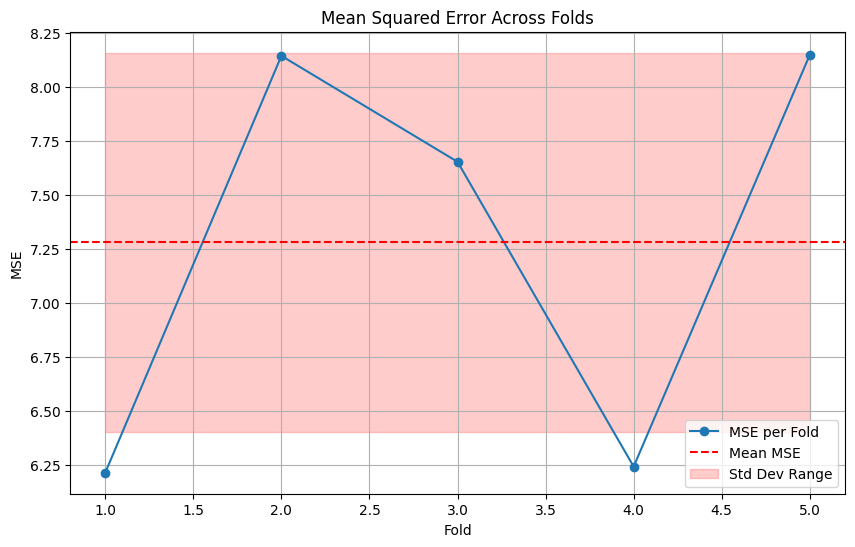

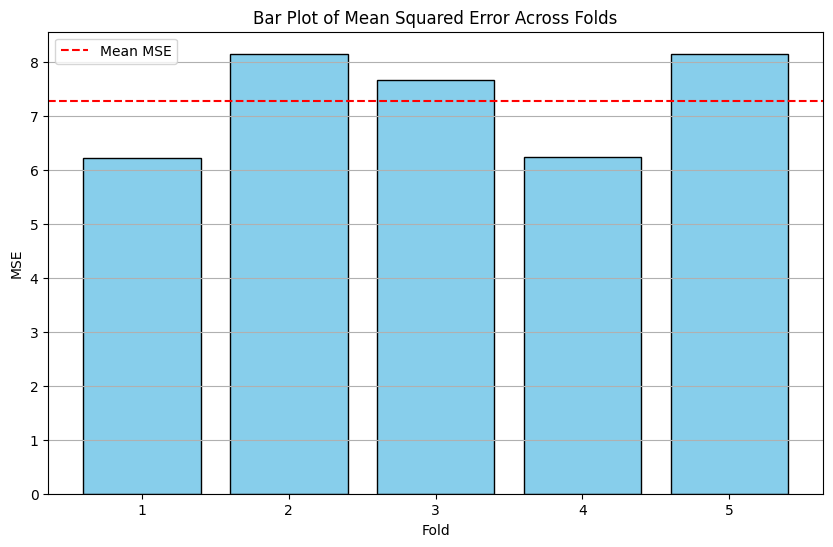

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', label='MSE per Fold')
plt.axhline(np.mean(mse_scores), color='r', linestyle='--', label='Mean MSE')
plt.fill_between(
    range(1, len(mse_scores) + 1),
    np.mean(mse_scores) - np.std(mse_scores),
    np.mean(mse_scores) + np.std(mse_scores),
    color='r',
    alpha=0.2,
    label='Std Dev Range'
)
plt.title('Mean Squared Error Across Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mse_scores) + 1), mse_scores, color='skyblue', edgecolor='black')
plt.axhline(np.mean(mse_scores), color='r', linestyle='--', label='Mean MSE')
plt.title('Bar Plot of Mean Squared Error Across Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.grid(axis='y')
plt.show()


#### **1. Mean Squared Error (MSE) Across Folds (Line Plot)**
- **What it shows**: 
  - The MSE values for each fold during cross-validation, with the red dashed line indicating the mean MSE and the shaded area showing the standard deviation range.

- **Key Observations**:
  - MSE varies across folds but remains within a relatively stable range.
  - The folds with the highest and lowest MSE represent the times when the model had more or less predictive success, likely due to differences in the temporal structure of the data.

- **Insights**:
  - The consistency of MSE across folds (no extreme outliers) indicates that the model is generally stable with log-transformed data.
  - However, there is still room for improvement, as the MSE is non-negligible across all folds.

---

#### **2. Bar Plot of MSE Across Folds**
- **What it shows**:
  - A bar chart representation of MSE for each fold, with the red dashed line indicating the mean MSE.

- **Key Observations**:
  - Folds have similar MSE values, with slight variations that align with the line plot.
  - The bars reflect relative consistency across folds, indicating that the model doesn't fail significantly in any specific time period.

- **Insights**:
  - This visualization reaffirms the observation that the model performs consistently across different folds, though there are opportunities to reduce MSE further.

In [152]:
r2_scores = []
residuals = []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred = ridge_model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    residuals.append(y_test - y_pred)

print("Additional Metrics Computed:")
print(f"R² Scores: {r2_scores}")


Additional Metrics Computed:
R² Scores: [0.5587134847390538, 0.5779557091733254, 0.5333383202073152, 0.6198324421745971, 0.4389874509100843]


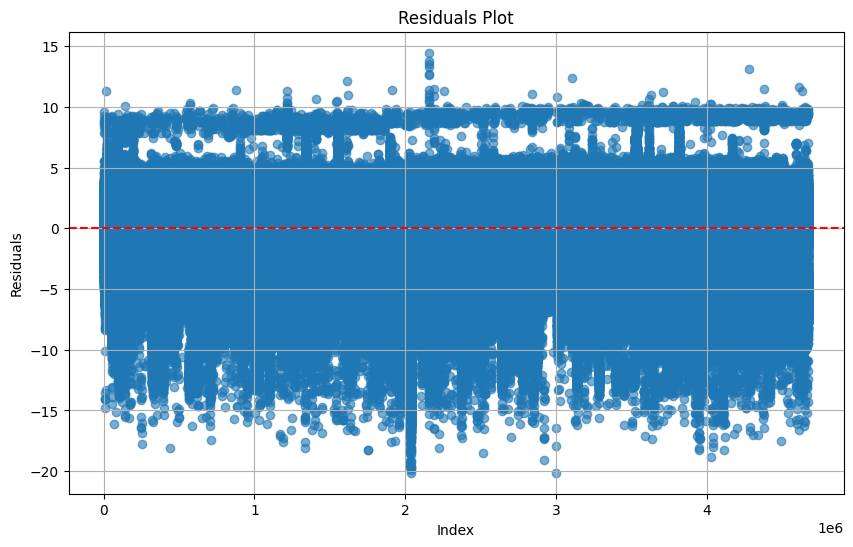

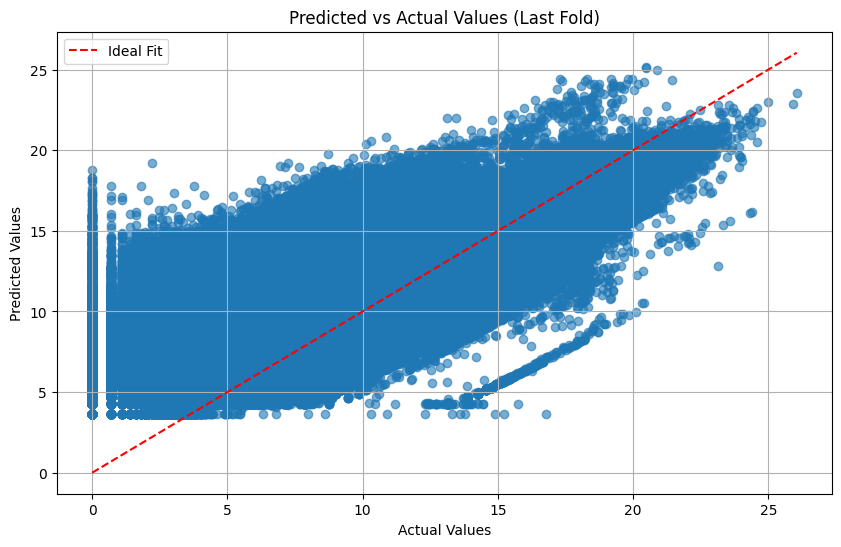

/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_82474/2219205511.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(residuals, labels=[f"Fold {i+1}" for i in range(len(residuals))])


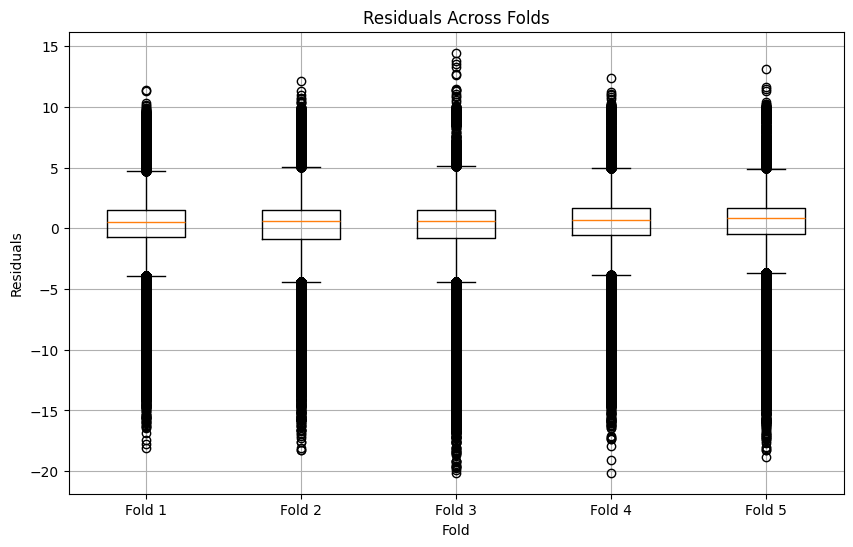

In [153]:
all_residuals = np.concatenate(residuals)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(all_residuals)), all_residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Values (Last Fold)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(residuals, labels=[f"Fold {i+1}" for i in range(len(residuals))])
plt.title("Residuals Across Folds")
plt.xlabel("Fold")
plt.ylabel("Residuals")
plt.grid()
plt.show()


#### **3. Residuals Plot**
- **What it shows**:
  - Residuals (difference between predicted and actual values) plotted against the index.
  - The red dashed line represents zero residuals (perfect predictions).

- **Key Observations**:
  - Residuals are scattered across a wide range, with some clustering near zero but notable outliers in both positive and negative directions.
  - The model occasionally overestimates or underestimates the target variable significantly.

- **Insights**:
  - The presence of extreme residuals suggests that while the model handles the majority of predictions well, certain data points are poorly predicted.
  - These outliers might indicate anomalies in the data or limitations in the model's ability to capture complex relationships.

---

#### **4. Predicted vs. Actual Values (Last Fold)**
- **What it shows**:
  - Scatter plot comparing predicted and actual values for the last fold.
  - The red dashed line represents the ideal case where predicted values perfectly match actual values.

- **Key Observations**:
  - Most points cluster along the diagonal line, indicating reasonable prediction accuracy.
  - There is a tendency for the model to slightly underpredict higher actual values, as seen by the scatter below the diagonal for larger actual values.

- **Insights**:
  - The underprediction of higher values suggests that the model may not fully capture the variability in high-value ranges.
  - Further tuning or additional features may help the model better handle these cases.


#### **5. Residuals Across Folds (Box Plot)**
- **What it shows**:
  - Box plots of residuals for each fold, showing the spread and presence of outliers.

- **Key Observations**:
  - The spread of residuals is fairly consistent across folds, with similar ranges and outliers.
  - Most residuals are close to zero, but some outliers extend significantly in both directions.

- **Insights**:
  - The consistent spread suggests that the model's performance is stable across different folds.
  - The outliers indicate specific cases where the model struggles, possibly due to missing information or inherent noise in the data.

---

### Overall Summary
- **Consistency**: The model performs consistently across folds, as evidenced by the similar MSE values and residual distributions.
- **Challenges**: The presence of residual outliers and underprediction of higher values highlight areas for improvement.
- **Next Steps**:
  - Explore advanced models (e.g., ensemble methods) to improve predictions for higher-value ranges - Which we already did in the previous sections under Baseline Models.

### <a id='toc4_1_'></a>[Comparison](#toc0_)

In [159]:
from IPython.display import Markdown as md
cols = ['Model', 'Train R²', 'Test R²', 'Train MSE', 'Test MSE']
linreg_dict = {
    'Model': 'Linear Regression', 
    'Train R²': linreg_train_r2, 
    'Test R²': linreg_test_r2, 
    'Train MSE': linreg_train_mse, 
    'Test MSE': linreg_test_mse}

dt_dict = {
    'Model': 'Decision Tree', 
    'Train R²': dt_train_r2, 
    'Test R²': dt_test_r2, 
    'Train MSE': dt_train_mse, 
    'Test MSE': dt_test_mse}

rf_dict = {
    'Model': 'Random Forest',
    'Train R²': rf_train_r2,
    'Test R²': rf_test_r2,
    'Train MSE': rf_train_mse,
    'Test MSE': rf_test_mse
}

xgboost_dict = {
    'Model': 'XGBoost',
    'Train R²': xgboost_train_r2,
    'Test R²': xgboost_test_r2,
    'Train MSE': xgboost_train_mse,
    'Test MSE': xgboost_test_mse
}
data = [
    linreg_dict,
    dt_dict,
    rf_dict,
    xgboost_dict
]

comparison_df = pd.DataFrame(data, columns=cols)
md(comparison_df.to_markdown())

|    | Model             |   Train R² |   Test R² |   Train MSE |   Test MSE |
|---:|:------------------|-----------:|----------:|------------:|-----------:|
|  0 | Linear Regression |   0.474415 |  0.509267 |    13.6274  |   13.6329  |
|  1 | Decision Tree     |   0.945476 |  0.868664 |     1.4137  |    3.64862 |
|  2 | Random Forest     |   0.948029 |  0.895895 |     1.34752 |    2.89211 |
|  3 | XGBoost           |   0.935397 |  0.899006 |     1.67503 |    2.8057  |

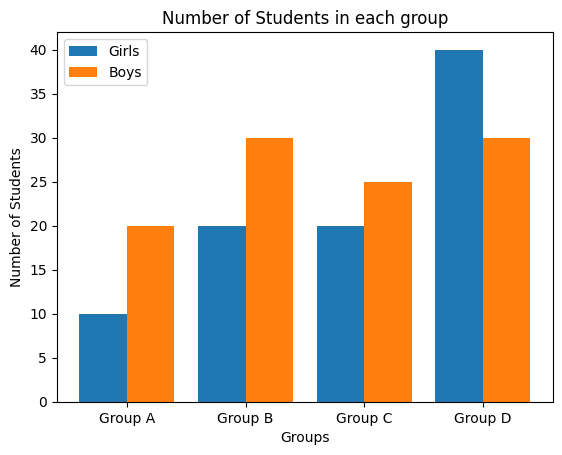

In [162]:
import numpy as np 
import matplotlib.pyplot as plt 

X = ['Group A','Group B','Group C','Group D'] 
Ygirls = [10,20,20,40] 
Zboys = [20,30,25,30] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls') 
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys') 

plt.xticks(X_axis, X) 
plt.xlabel("Groups") 
plt.ylabel("Number of Students") 
plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 


<BarContainer object of 4 artists>

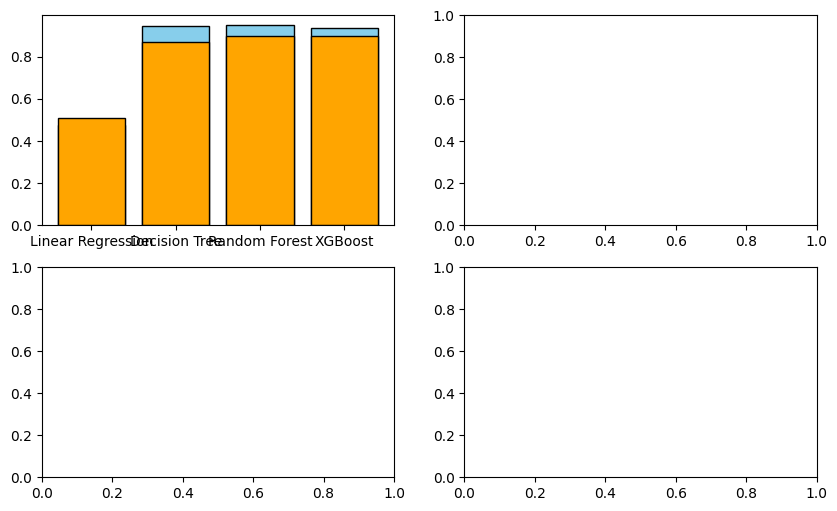

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
X = comparison_df['Model']
X_axis = np.arange(len(X))
bar_width = 0.35
ax[0,0].bar(X_axis, comparison_df['Train R²'], bar_width = bar_width, color='skyblue', edgecolor='black', label="Train R²")
ax[0,0].bar(X_axis + bar_width, comparison_df['Test R²'], bar_width = bar_width, color='skyblue', edgecolor='black', label="Test R²")

### <a id='toc5_1_'></a>[Conclusion](#toc0_)